In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import table 

In [2]:
data = pd.read_parquet("data/06_calculate_distance.parquet")
data

,id,question,context,answers,source,th_aug,th_fasttext_aug,th_llm_gec_aug,th_llm_paraphrase_aug,th_ltw2v_aug,...,dis_llm_paraphrase_aug,dis_ltw2v_aug,dis_qcpg_0.2_aug,dis_qcpg_0.2_llm_gec_aug,dis_qcpg_0.5_aug,dis_qcpg_0.5_llm_gec_aug,dis_qcpg_0.8_aug,dis_qcpg_0.8_llm_gec_aug,dis_thai2fit_aug,dis_wordnet_aug
0,82c589fda5d3007be968f303e04a9ac58953299a64a5be...,พัทธ์ธีรา ศรุติพงศ์โภคิน เกิดวันที่เท่าไร?,พัทธ์ธีรา ศรุติพงศ์โภคิน (เกิด 3 ธันวาคม พ.ศ. ...,"{'text': ['3 ธันวาคม พ.ศ. 2533'], 'answer_star...",iapp,Phatthira Sarutpong Phokin วันเดือนปีเกิดคืออะไร?,พัณณ์ธีภ ศรุติวัฒน์2โภคิน เกิดวันที่ไหร่?,วันเดือนปีเกิดของ Phatthira Sarutpong Phokin ค...,Phatthira Sarutpong Phokin คุณช่วยจัดเตรียมวัน...,พัทธ์ธีรา ศรุติพงษ์โภคิน ทำให้เกิดวันอาทิตย์เท...,...,0.654346,0.333436,0.942305,0.901118,0.901118,0.783473,0.677738,0.642690,0.595411,0.224245
1,6483e513603bd34b6f23a5fbe9e1c1db194ce4f4365a69...,พัทธ์ธีรา ศรุติพงศ์โภคิน มีฃื่อเล่นว่าอะไร?,พัทธ์ธีรา ศรุติพงศ์โภคิน (เกิด 3 ธันวาคม พ.ศ. ...,"{'text': ['อร'], 'answer_start': [68], 'answer...",iapp,Phatthira Sarutpong Phokin คุณกำลังเล่นอะไรอยู่?,พัทธ์ธีรา ศิษฎพงศ์อรัช dcccxxxii ในPSPเล่นว่าอ...,คุณกำลังเล่นอะไร Phatthira Sarutpong Phokin?,Phatthira Sarutpong Phokin คุณกำลังเล่นเกมอะไร...,พัทธ์ธีรา ศรุติพงษ์โภคิน มีฃื่อเล่นว่าอะไร?,...,0.600163,0.285477,0.712166,0.668647,0.792416,0.537381,0.611034,0.867701,0.387706,0.000000
2,09fc57198420c10d8cd67154a154cca37fdcde53ec894a...,พัทธ์ธีรา ศรุติพงศ์โภคิน ทำอาชีพอะไร?,พัทธ์ธีรา ศรุติพงศ์โภคิน (เกิด 3 ธันวาคม พ.ศ. ...,"{'text': ['นักแสดงหญิงชาวไทย'], 'answer_start'...",iapp,อาชีพของ Phatthira Teerathiyapong Phokin คืออะไร?,รพนธ์ธีคาต ศรุติวรรณ2โภคิน ทำอาชีพอะไร4?,อาชีพของ Phatthira Teerathiyapong Phokin คืออะไร?,อาชีพของ Phatthira Teerathiyapong Phokin คืออะไร?,พัทธ์ธีรา ศรุติพงษ์โภคิน ทำอาชีพอะไร?,...,0.690551,0.227241,0.896181,0.896181,0.617513,0.617513,0.750872,0.750872,0.392775,0.000000
3,7b2f336d3dbc29c6fb1edf7f4988f968ed0a1272fe8aff...,พัทธ์ธีรา ศรุติพงศ์โภคิน จบการศึกษาจากประเทศอะไร?,พัทธ์ธีรา ศรุติพงศ์โภคิน (เกิด 3 ธันวาคม พ.ศ. ...,"{'text': ['ประเทศนิวซีแลนด์'], 'answer_start':...",iapp,Phatthira Sarutpong Phokin จบการศึกษาจากประเทศ...,พัทธ์ธีรา ตอัตถพงศ์ฯกุล1 จบการศึกษาจากภ.ต่างอะ...,Phatthira Sarutpong Phokin จบการศึกษาจากประเทศใด?,Phatthira Sarutpong Phokin จากประเทศใดจากการศึ...,พัทธ์ธีรา ศรุติพงษ์โภคิน จบการศึกษาจากในประเทศ...,...,0.659828,0.469348,0.723428,0.849254,0.870112,0.849254,0.528563,0.648129,0.376103,0.276969
4,50c66c986cdf19b60f36da1b89137a6ceb4f11aa9ed0e9...,บิดาของคลีโอพัตราเป็นใคร?,คลีโอพัตราที่ 7 ฟิโลพาเธอร์ (กรีก: Κλεοπάτρα θ...,"{'text': ['ทอเลมีที่ 12 ออเลติส'], 'answer_sta...",iapp,พ่อของคลีโอพัตราคือใคร?,บิดาของมเนสโอพัตตกฺขหลายๆใคร?,พ่อของคลีโอพัตราคือใคร?,พ่อผู้ให้กำเนิดของคลีโอพัตราคือใคร?,มารดาของคลีโอพัตราเป็นใคร?,...,0.630858,0.627320,0.716229,0.672312,0.727237,0.751295,0.794606,0.794606,0.574593,0.631798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16975,e780cc4812dd88f21ec7f0152905b15588d1a6faab66d2...,หนังสือการ์ตูนชานะ นักรบเนตรอัคคี มีกี่เล่ม?,นิยาย ชานะ นักรบเนตรอัคคี แต่งโดย ยาชิจิโร ทาค...,"{'text': ['22', '26'], 'answer_start': [267, 9...",tydiqa,หนังสือการ์ตูนนักรบดับเพลิงกี่คน?,หนังสือDIYการ์ตูนPokemonชานะ อุดมการณ์ถ.ทิพยเน...,นักรบดับเพลิงมีกี่คนในหนังสือการ์ตูน?,ในหนังสือการ์ตูนมีนักรบดับเพลิงกี่คน?,หนังสือการ์ตูนชาน่ะ นักรบเนตรอัคคี มีกี่เล่ม?,...,0.911251,0.195957,0.880506,0.930000,0.899868,0.930000,0.910610,0.905050,0.312825,0.522812
16976,dd424979403f3909773a832c4d83818e564fe7bfeb4f38...,ไบโอช็อก อินฟินิต เปิดตัวครั้งแรกเมื่อไหร่?,ไบโอช็อก อินฟินิต (English: BioShock Infinite)...,"{'text': ['26 มีนาคม พ.ศ. 2556', '26 มีนาคม พ....",tydiqa,BioShock Infin เปิดตัวครั้งแรกเมื่อใด?,ไบโอมีช๊อค อร์เนชยมีฟิตี้07ต เปิดตัวครั้งแรกเม...,BioShock Infinite เปิดตัวครั้งแรกเมื่อใด?,การเปิดตัวครั้งแรกของ BioShock Infinite คือเมื...,ไบโอช็อค อินฟินิต เผยโฉมเป็นครั้งแรกเมื่อไร?,...,0.880787,0.476029,0.900869,0.820951,0.922494,0.922002,0.901534,0.925271,0.458451,0.00000

In [4]:
# Get all numerical columns in data
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
numerical_columns

Index(['dis_aug', 'dis_fasttext_aug', 'dis_llm_gec_aug',
       'dis_llm_paraphrase_aug', 'dis_ltw2v_aug', 'dis_qcpg_0.2_aug',
       'dis_qcpg_0.2_llm_gec_aug', 'dis_qcpg_0.5_aug',
       'dis_qcpg_0.5_llm_gec_aug', 'dis_qcpg_0.8_aug',
       'dis_qcpg_0.8_llm_gec_aug', 'dis_thai2fit_aug', 'dis_wordnet_aug'],
      dtype='object')

# Distance Statistics

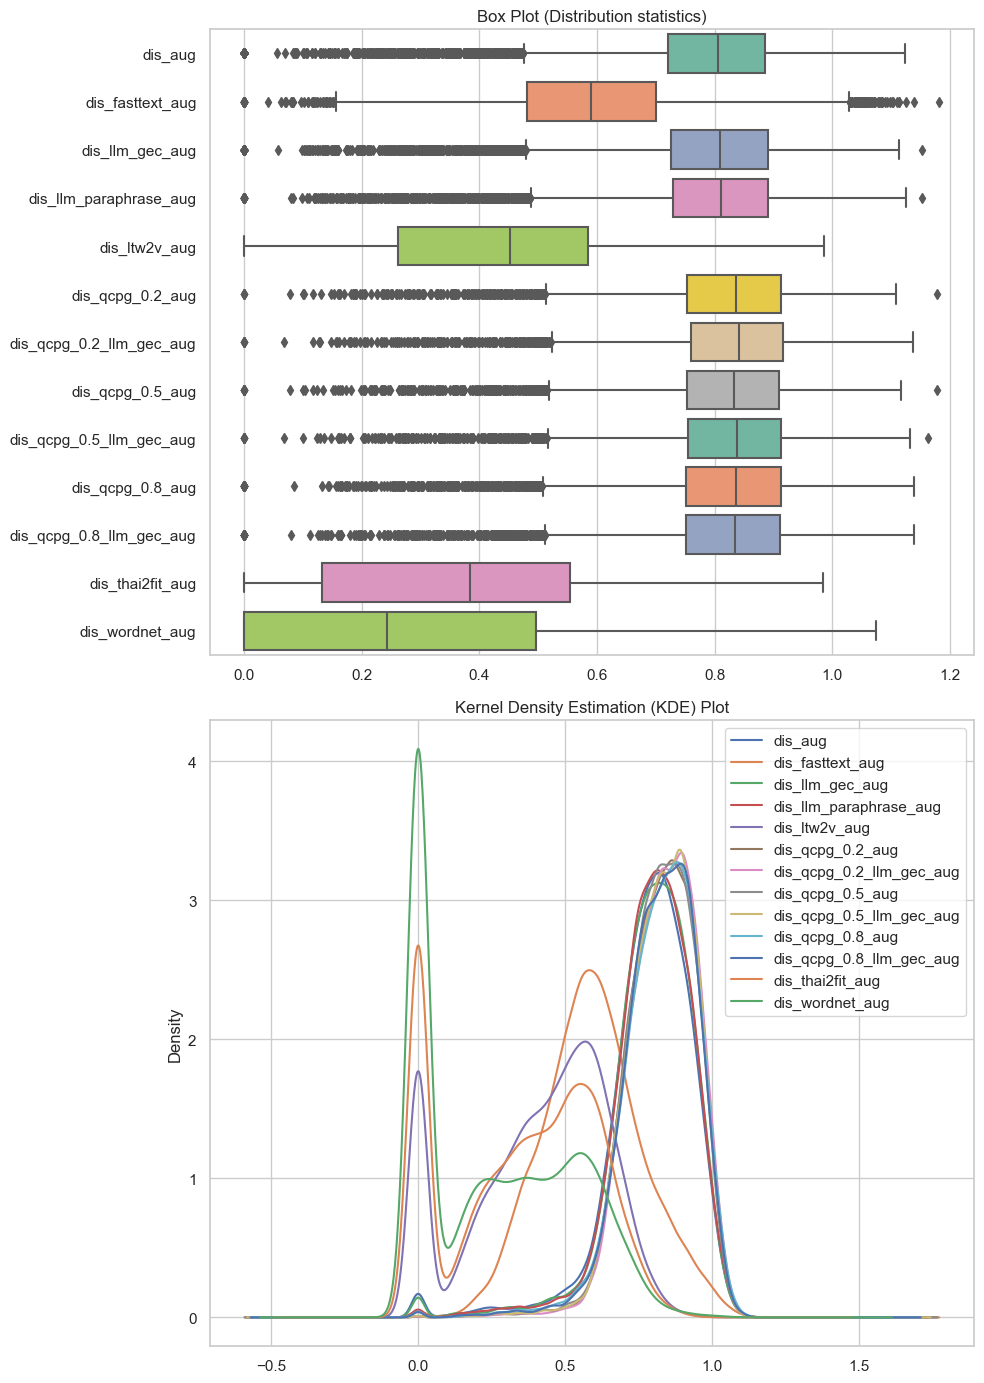

In [6]:
# Plotting
sns.set(style="whitegrid")
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 14))

# First plot with Boxplot for distribution
sns.boxplot(data=data[numerical_columns], orient='h', palette="Set2", ax=axs[0])
axs[0].set_title('Box Plot (Distribution statistics)')

# Second plot with KDE plots for each data set
data[numerical_columns].plot(kind='density', ax=axs[1])
axs[1].set_title('Kernel Density Estimation (KDE) Plot')

plt.tight_layout()
plt.show()

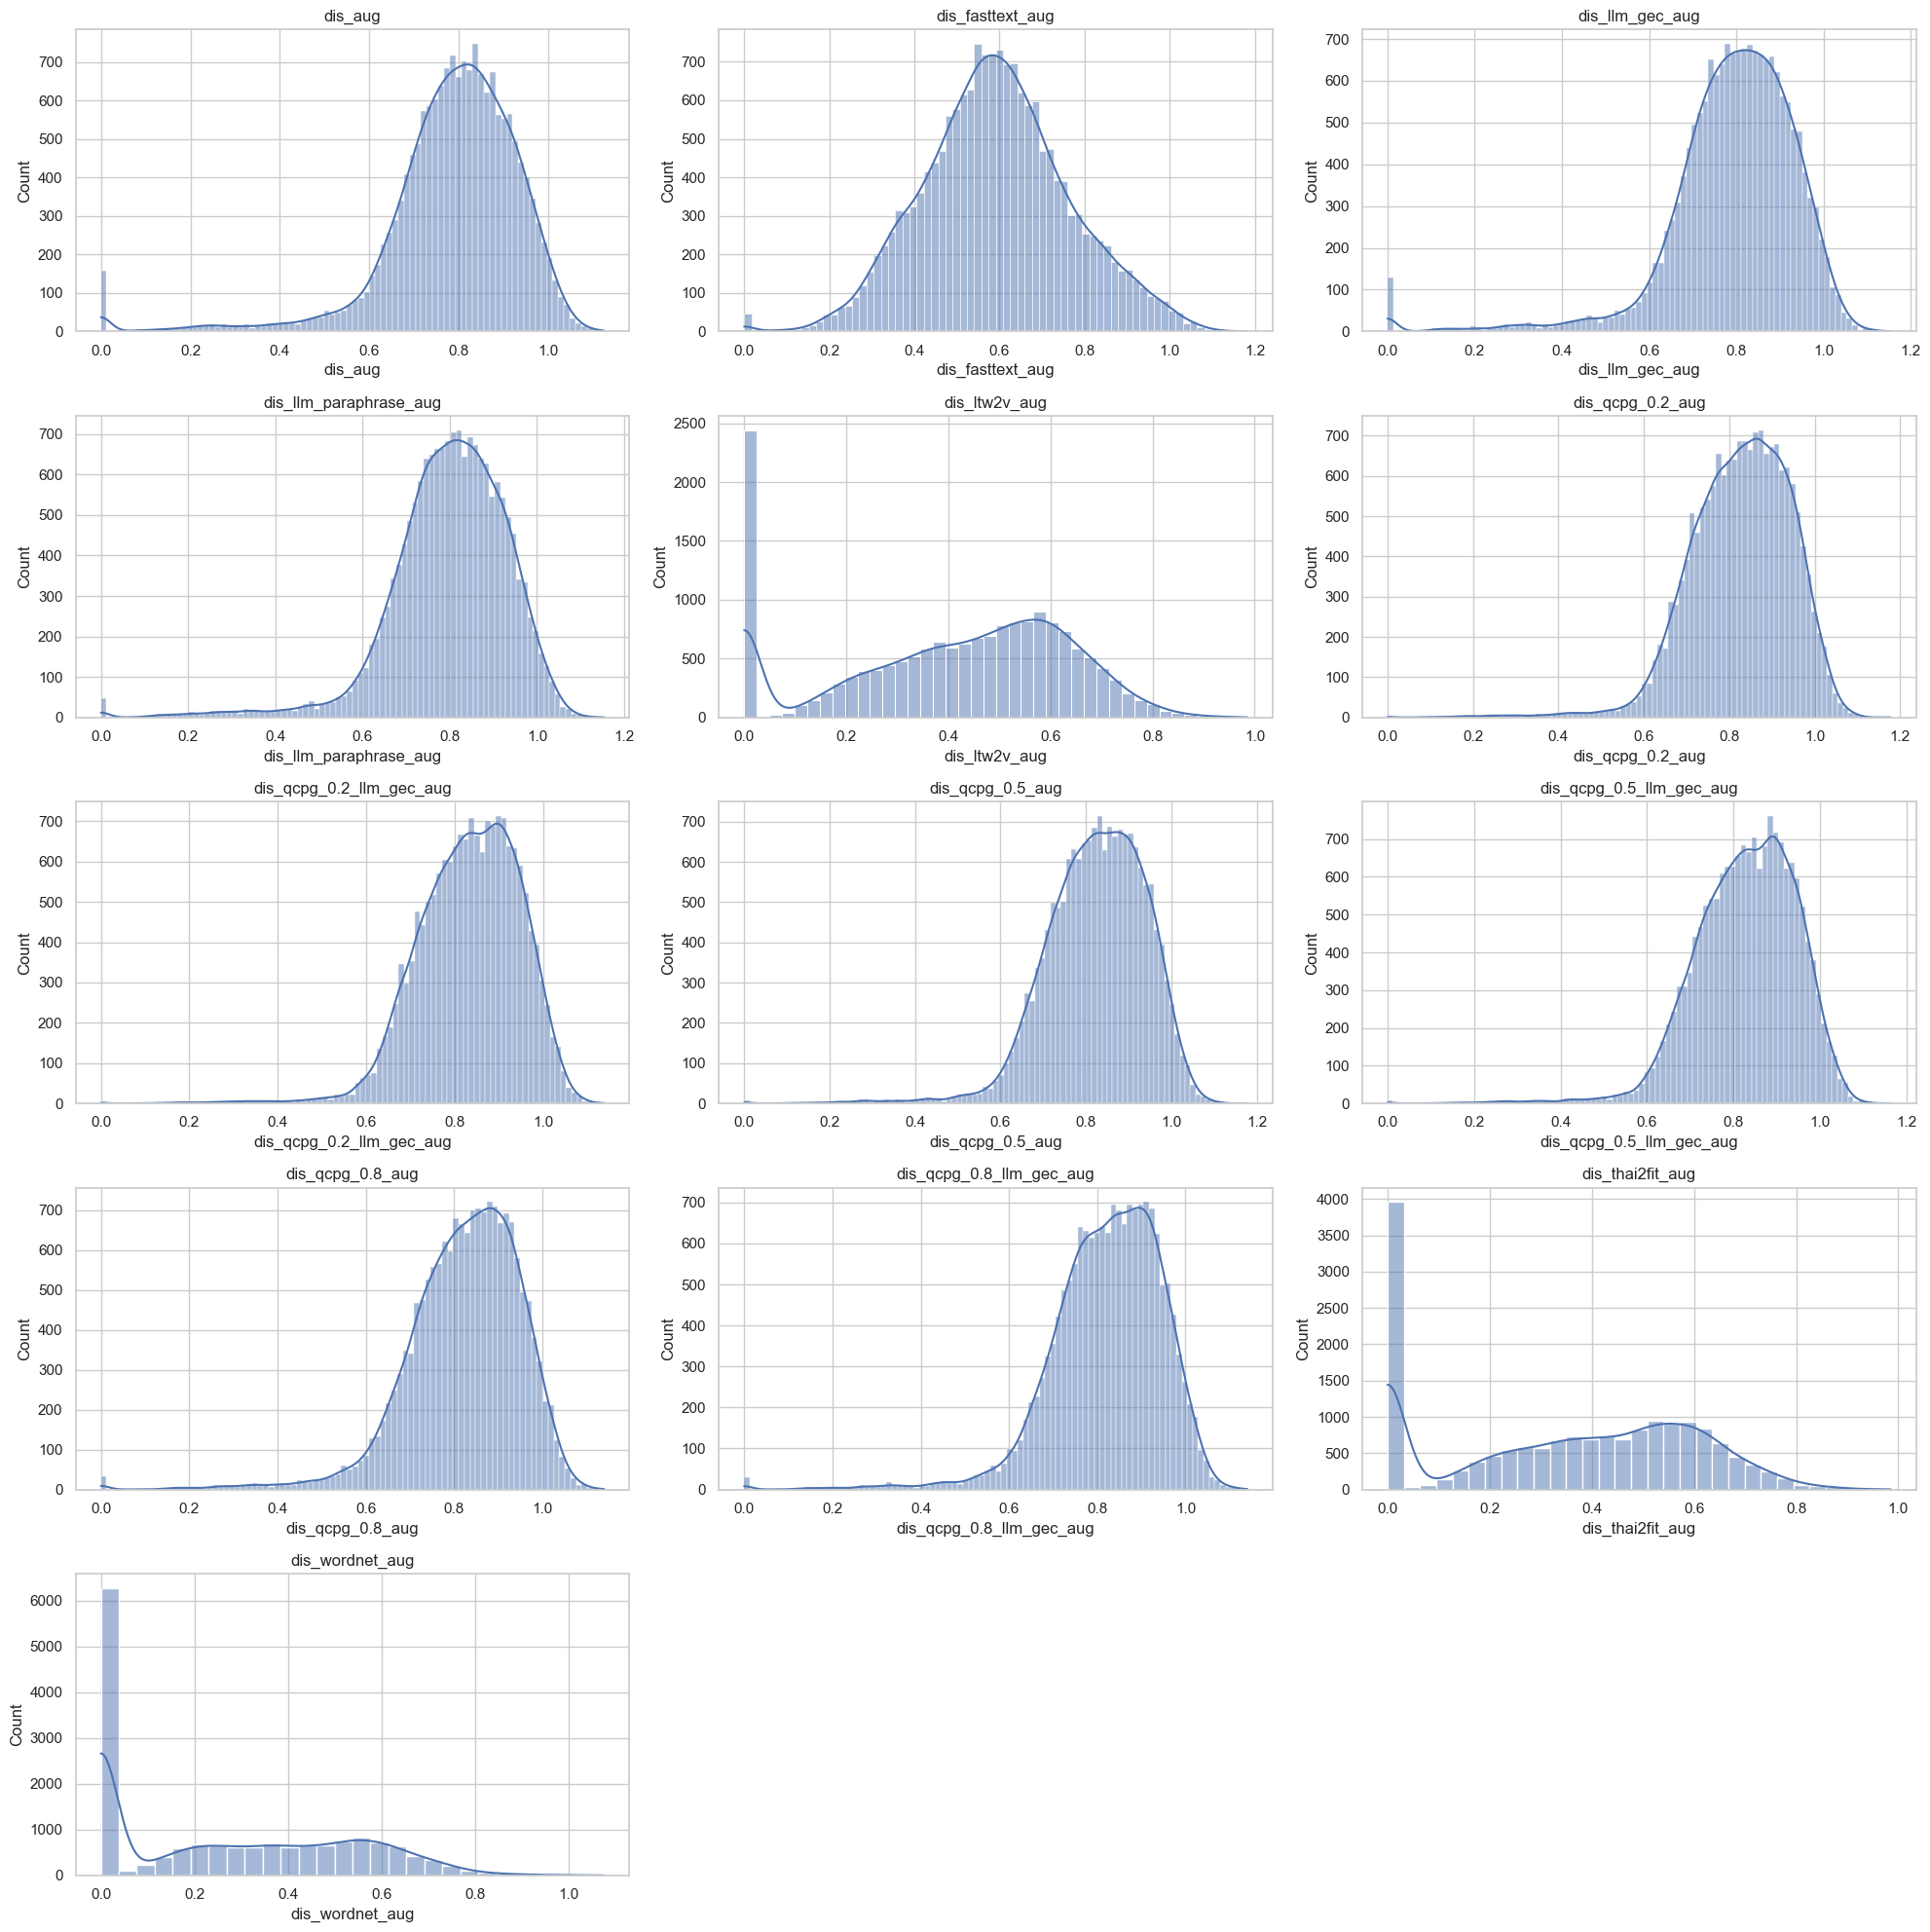

In [16]:
num_datasets = len(numerical_columns)

# Calculate the number of rows and columns to create a grid
num_rows = int(np.ceil(num_datasets / 3.))  # Change divisor to control number of columns
num_cols = 3  # Change this to control number of columns

fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 4))

for ind, column in enumerate(numerical_columns):
    i = ind // num_cols
    j = ind % num_cols
    sns.histplot(data[column], kde=True, ax=axs[i, j])
    axs[i, j].set_title(column)

# Remove empty subplots
if num_datasets % num_cols != 0:
    for idx in range(num_datasets, num_rows*num_cols):
        fig.delaxes(axs.flatten()[idx])

plt.tight_layout()
plt.show()

# ReQA Analysis

In [17]:
reqa_results = pd.read_csv("results/07_benchmark_reqa.csv")
reqa_results

,source,name,top_1,top_5,top_10,norm_top_1,norm_top_5,norm_top_10,mrr_score,data_length
0,iapp,original,42,172,223,0.005812,0.023803,0.030861,0.012441,7226
1,iapp,th_aug,197,356,395,0.027263,0.049267,0.054664,0.035851,7226
2,iapp,th_fasttext_aug,522,958,1081,0.072239,0.132577,0.149599,0.097408,7226
3,iapp,th_llm_gec_aug,166,306,351,0.022973,0.042347,0.048575,0.030814,7226
4,iapp,th_llm_paraphrase_aug,155,293,335,0.021450,0.040548,0.046360,0.029291,7226
5,iapp,th_ltw2v_aug,1288,2138,2292,0.178245,0.295876,0.317188,0.226710,7226
6,iapp,th_qcpg_0.2_aug,77,156,194,0.010656,0.021589,0.026847,0.015277,7226
7,iapp,th_qcpg_0.2_llm_gec_aug,61,149,184,0.008442,0.020620,0.025464,0.013509,7226
8,iapp,th_qcpg_0.5_aug,86,172,213,0.011901,0.023803,0.029477,0.016990,7226
9,iapp,th_qcpg_0.5_llm_gec_aug,71,162,202,0.009826,0.022419,0.027955,0.015016,7226


In [25]:
reqa_results.sort_values('norm_top_1', ascending=False)

,source,name,top_1,top_5,top_10,norm_top_1,norm_top_5,norm_top_10,mrr_score,data_length
27,thaiqa,th_wordnet_aug,1803,2045,2099,0.445075,0.504814,0.518144,0.472066,4051
26,thaiqa,th_thai2fit_aug,1465,1767,1852,0.361639,0.436189,0.457171,0.393940,4051
55,tydiqa,th_wordnet_aug,1495,1844,1918,0.330533,0.407694,0.424055,0.363046,4523
19,thaiqa,th_ltw2v_aug,1277,1623,1748,0.315231,0.400642,0.431498,0.354064,4051
13,iapp,th_wordnet_aug,2134,2916,3044,0.295322,0.403543,0.421257,0.341590,7226
54,tydiqa,th_thai2fit_aug,1230,1744,1854,0.271943,0.385585,0.409905,0.319754,4523
41,xquad,th_wordnet_aug,303,340,350,0.256780,0.288136,0.296610,0.269681,1180
47,tydiqa,th_ltw2v_aug,953,1408,1529,0.210701,0.311298,0.338050,0.254328,4523
12,iapp,th_thai2fit_aug,1384,2023,2193,0.191531,0.279961,0.303487,0.229973,7226
5,iapp,th_ltw2v_aug,1288,2138,2292,0.178245,0.295876,0.317188,0.226710,7226
